## Load Custom Feature definitions
The smart feature file was taken from pmapper

In [28]:
import pickle
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.ipython_useSVG=True

In [13]:
feats_dict = {} 

# Load custom features file
with open("./data/smarts_features.txt", "r") as file: 
    for line in file:
        if line[0] == "#" or line[0] == '\n':
            continue
        line = line.split(' ')
        feat_def = line[0]
        feat_name = line[1].rstrip()
        feats_dict[feat_def] = feat_name

with open('./data/smarts_feats', 'ab') as f:
    pickle.dump(feats_dict, f)

del feats_dict

In [19]:
with open('./data/smarts_feats', 'rb') as f:
    feats_dict = pickle.load(f)

feats_dict

{'a1aaaaa1': 'a',
 'a1aaaa1': 'a',
 '[#7!H0&!$(N-[SX4](=O)(=O)[CX4](F)(F)F)]': 'D',
 '[#8!H0&!$([OH][C,S,P]=O)]': 'D',
 '[#16!H0]': 'D',
 '[#7&!$([nX3])&!$([NX3]-*=[!#6])&!$([NX3]-[a])&!$([NX4])&!$(N=C([C,N])N)]': 'A',
 '[$([O])&!$([OX2](C)C=O)&!$(*(~a)~a)]': 'A',
 '[$([NX3]([CX4])([CX4,#1])[CX4,#1])&!$([NX3]-*=[!#6])]': 'P',
 '[$([CX3](=N)(-N)[!N])](=N)-N': 'P',
 'N=[CX3](N)-N': 'P',
 '[$([+,+2,+3])&!$(*[-,-2,-3])]': 'P',
 'c1nn[nH1]n1': 'N',
 '[$([SX4,PX4](=O)(=O)[O-,OH])](=O)(=O)[O-,OH]': 'N',
 '[$([CX3,SX3,PX3](=O)[O-,OH])](=O)[O-,OH]': 'N',
 '[$([-,-2,-3])&!$(*[+,+2,+3])]': 'N',
 '[$([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])&!$(**[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])]': 'H',
 '[$(*([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])&!$(*([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])]([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I]': 'H',
 '*([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I]':

5 molecules


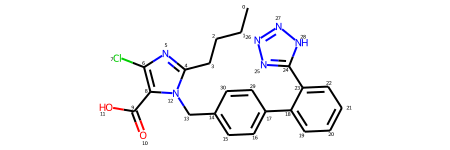

In [29]:
# Load inhibitors from smi file 
molecules = Chem.SmilesMolSupplier('./data/clique/molecules.smi',delimiter='\t',titleLine=False)
print(f"{len(molecules)} molecules")
# Visualize first molecule
molecules[0]

In [32]:
mymol = molecules[0]
mymol = Chem.AddHs(mymol)

for feat, feat_type in feats_dict.items():
    pattern = Chem.MolFromSmarts(feat)  
    match = mymol.GetSubstructMatch(pattern)
    if len(match) >= 1:
        print(match, feat_type)

(14, 15, 16, 17, 29, 30) a
(4, 5, 6, 8, 12) a
(28,) D
(5,) A
(10,) A
(9, 10, 11) N
(0,) H
(1, 0) H
(1, 2, 3) H


In [23]:
p = Chem.MolFromSmarts('a1aaaaa1')
mymol.GetSubstructMatch(p)

(14, 15, 16, 17, 29, 30)